In [1]:
# stacked generalization with linear meta model on blobs dataset
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression
from matplotlib import pyplot


In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
#x_train  y_train to train
#x_test   y_test to test
#x_valid  y_valid 
#video
import joblib
x_test_prediction = joblib.load('/content/drive/My Drive/fusion/video/data_set_fusion/expert5/test/pred_test')
x_train_prediction = joblib.load('/content/drive/My Drive/fusion/video/data_set_fusion/expert5/train/pred_train')
x_valid_prediction = joblib.load('/content/drive/My Drive/fusion/video/data_set_fusion/expert5/valid/pred_valid')
y_test = joblib.load('/content/drive/My Drive/fusion/video/data_set_fusion/expert5/test/labels_test')
y_train = joblib.load('/content/drive/My Drive/fusion/video/data_set_fusion/expert5/train/labels_train')
y_valid = joblib.load('/content/drive/My Drive/fusion/video/data_set_fusion/expert5/valid/labels_valid')
#audio

x_audio_test_prediction = joblib.load('/content/drive/My Drive/fusion/final_audio/data_set_fusion/expert5/test/predict_test')
x_audio_train_prediction = joblib.load('/content/drive/My Drive/fusion/final_audio/data_set_fusion/expert5/train/predict_train')
x_audio_valid_prediction = joblib.load('/content/drive/My Drive/fusion/final_audio/data_set_fusion/expert5/valid/predict_valid')
"""
#samples name
test_videos= joblib.load('/content/drive/My Drive/fusion/video/data_set_fusion/expert1/test/video_test_path')
train_videos = joblib.load('/content/drive/My Drive/fusion/video/data_set_fusion/expert1/train/video_train_path')
valid_videos = joblib.load('/content/drive/My Drive/fusion/video/data_set_fusion/expert1/valid/video_valid_path')
"""

"\n#samples name\ntest_videos= joblib.load('/content/drive/My Drive/fusion/video/data_set_fusion/expert1/test/video_test_path')\ntrain_videos = joblib.load('/content/drive/My Drive/fusion/video/data_set_fusion/expert1/train/video_train_path')\nvalid_videos = joblib.load('/content/drive/My Drive/fusion/video/data_set_fusion/expert1/valid/video_valid_path')\n"

In [4]:
len(x_test_prediction),len(x_train_prediction),len(x_audio_test_prediction),len(x_audio_train_prediction),len(x_valid_prediction),len(x_audio_valid_prediction)

(207, 1653, 207, 1653, 207, 207)

In [5]:
#x_train for video
x_train_prediction=x_train_prediction.append(x_valid_prediction,ignore_index = True)
#x_train for audio
x_audio_train_prediction=x_audio_train_prediction.append(x_audio_valid_prediction,ignore_index = True)

In [6]:
len(x_audio_train_prediction),len(x_train_prediction)

(1860, 1860)

In [7]:
from pandas.core.frame import DataFrame
df_train=DataFrame(y_train,columns=['labels'])
df_valid=DataFrame(y_valid,columns=['labels'])

In [8]:
df_train=df_train.append(df_valid,ignore_index = True)

In [9]:
len(df_train)

1860

In [10]:
df_train

,labels
0,1
1,0
2,1
3,2
4,2
...,...
1855,3
1856,1
1857,5
1858,5


In [11]:
import pandas as pd

x_train = pd.concat([x_train_prediction, x_audio_train_prediction], axis=1,join='inner')
x_test =  pd.concat([x_test_prediction, x_audio_test_prediction], axis=1,join='inner')

In [12]:
x_test

,OV_0,OV_1,OV_2,OV_3,OV_4,OV_5,OA_0,OA_1,OA_2,OA_3,OA_4,OA_5
0,0.000002,0.000616,0.999156,0.000070,0.000015,0.000141,3.120543e-09,1.878039e-07,9.712390e-01,2.847798e-02,2.126502e-07,2.825581e-04
1,0.070524,0.924814,0.001640,0.001804,0.001131,0.000087,2.814680e-18,9.999990e-01,7.501311e-07,1.844225e-07,1.812109e-14,1.011151e-14
2,0.000057,0.000164,0.000066,0.001010,0.995511,0.003193,2.975224e-03,1.990036e-04,5.236944e-01,8.508634e-02,2.055436e-01,1.825015e-01
3,0.000493,0.000126,0.000069,0.004140,0.926091,0.069081,2.915305e-09,1.042901e-11,4.304118e-04,8.434960e-07,9.993483e-01,2.204236e-04
4,0.867374,0.088145,0.000096,0.043439,0.000198,0.000748,6.149637e-02,1.610519e-08,1.248254e-06,8.577012e-01,3.309720e-07,8.080090e-02
...,...,...,...,...,...,...,...,...,...,...,...,...
202,0.013694,0.008708,0.000044,0.723786,0.250908,0.002860,2.256047e-09,1.970846e-10,6.843630e-07,9.934046e-08,9.999992e-01,4.158084e-10
203,0.000189,0.001172,0.002108,0.000934,0.873140,0.122457,1.264513e-09,1.685255e-09,2.225480e-04,3.071244e-06,9.996568e-01,1.176655e-04
204,0.000157,0.000339,0.001526,0.003077,0.117318,0.877584,1.842989e-06,1.257121e-10,9.362705e-05,4.167560e-05,2.702758e-01,7.295870e-01
205,0.000283,0.000095,0.000185,0.009486,0.001196,0.988754,1.579074e-04,1.233524e-06,2.652438e-04,4.022013e-05,1.279410e-04,9.994074e-01


In [13]:
len(x_test),len(x_train)

(207, 1860)

In [14]:
x_train

,OV_0,OV_1,OV_2,OV_3,OV_4,OV_5,OA_0,OA_1,OA_2,OA_3,OA_4,OA_5
0,0.003411,0.987883,0.007827,0.000725,0.000091,0.000064,7.452684e-04,9.984699e-01,1.155615e-04,0.000649,2.139574e-06,1.791606e-05
1,0.946476,0.041576,0.000079,0.007025,0.004232,0.000614,9.936737e-01,4.417195e-05,3.568929e-03,0.001013,4.949052e-04,1.205095e-03
2,0.335372,0.644594,0.001657,0.016966,0.000159,0.001252,1.381475e-05,9.909487e-01,9.001423e-03,0.000019,1.571672e-05,9.877971e-07
3,0.000014,0.000685,0.995223,0.000722,0.000039,0.003317,1.026852e-04,8.015258e-05,9.991412e-01,0.000140,3.136253e-05,5.051437e-04
4,0.000002,0.001680,0.998102,0.000089,0.000024,0.000103,1.043385e-06,2.146033e-07,9.987963e-01,0.000879,3.184161e-04,4.484669e-06
...,...,...,...,...,...,...,...,...,...,...,...,...
1855,0.000718,0.000579,0.000208,0.816382,0.020579,0.161535,5.307785e-06,2.511110e-09,1.015465e-06,0.999869,2.135202e-07,1.243104e-04
1856,0.029151,0.967429,0.001374,0.001910,0.000038,0.000099,9.454942e-08,6.908455e-01,3.090858e-01,0.000057,7.106598e-10,1.112847e-05
1857,0.000801,0.000096,0.000103,0.014107,0.003850,0.981043,2.638927e-03,1.054727e-02,1.855539e-05,0.009019,3.841746e-11,9.777768e-01
1858,0.000236,0.000068,0.000225,0.009715,0.000862,0.988894,1.261675e-04,3.208694e-07,1.532342e-03,0.001139,4.100581e-03,9.931020e-01


In [15]:
from sklearn.utils import shuffle
seed=42
new_x_train = shuffle(x_train,random_state=seed)
new_y_train = shuffle(df_train,random_state=seed)
new_x_train = new_x_train.reset_index(drop=True)
new_y_train = new_y_train.reset_index(drop=True)
"""
y_train=df_train.to_numpy()
y_train=y_train.reshape(1860,)
y_train, y_train.shape
"""

'\ny_train=df_train.to_numpy()\ny_train=y_train.reshape(1860,)\ny_train, y_train.shape\n'

In [16]:
len(new_y_train)

1860

In [17]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler
scaler = MinMaxScaler(feature_range=(0, 1))
new_x_train = scaler.fit_transform(new_x_train)
X_test = scaler.transform(x_test)

In [18]:
y_train=df_train.to_numpy()
y_train=y_train.reshape(1860,)
y_train, y_train.shape

(array([1, 0, 1, ..., 5, 5, 5]), (1860,))

# training machine learning

In [19]:
from sklearn.svm import SVC
model = SVC(random_state=seed, kernel='rbf')
svm=model.fit(x_train,y_train)
predictions = model.predict(x_test)
#print("Restored model, accuracy: {:5.2f}%".format(100*acc))

In [20]:
predictions

array([2, 1, 4, 4, 3, 5, 4, 1, 5, 3, 3, 2, 0, 5, 2, 2, 3, 3, 2, 1, 2, 4,
       1, 5, 4, 2, 3, 0, 3, 3, 0, 3, 2, 3, 3, 4, 4, 5, 1, 4, 0, 0, 4, 4,
       0, 2, 2, 2, 3, 0, 4, 2, 5, 5, 5, 1, 3, 3, 1, 0, 5, 4, 5, 3, 3, 5,
       5, 4, 3, 5, 5, 2, 5, 5, 1, 4, 5, 2, 3, 1, 4, 4, 3, 5, 2, 0, 1, 2,
       0, 0, 5, 5, 2, 2, 4, 1, 5, 0, 1, 3, 2, 2, 2, 1, 4, 1, 3, 1, 4, 1,
       4, 1, 4, 4, 1, 2, 5, 5, 0, 4, 4, 1, 3, 2, 2, 5, 1, 5, 2, 4, 4, 3,
       4, 1, 5, 2, 4, 2, 2, 0, 3, 3, 5, 3, 2, 1, 1, 5, 2, 0, 4, 0, 1, 5,
       2, 2, 5, 1, 4, 5, 5, 3, 5, 2, 2, 1, 1, 4, 5, 1, 3, 4, 3, 0, 5, 3,
       2, 1, 0, 4, 2, 4, 4, 4, 1, 2, 3, 4, 4, 2, 4, 5, 2, 1, 5, 1, 3, 5,
       5, 3, 3, 5, 4, 4, 5, 5, 4])

              precision    recall  f1-score   support

           0       1.00      0.86      0.92        21
           1       0.88      0.93      0.90        30
           2       1.00      0.95      0.97        41
           3       0.79      0.93      0.86        29
           4       0.98      0.91      0.94        45
           5       0.88      0.90      0.89        41

    accuracy                           0.92       207
   macro avg       0.92      0.91      0.92       207
weighted avg       0.92      0.92      0.92       207

----accuracy score 91.78743961352657 ----


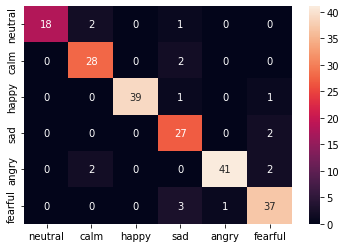

In [21]:
from sklearn.metrics import classification_report, confusion_matrix,accuracy_score
import seaborn as sn
import matplotlib.pyplot as plt

print(classification_report(y_test,predictions))

acc = float(accuracy_score(y_test,predictions))*100
print("----accuracy score %s ----" % acc)

cm = confusion_matrix(y_test,predictions)
#df_cm = pd.DataFrame(cm)
class_names = ['neutral','calm', 'happy','sad','angry', 'fearful' ]
df_cm = pd.DataFrame(cm, index=class_names, columns=class_names,)
sn.heatmap(df_cm, annot=True, fmt='')
plt.show()

In [22]:
path='/content/drive/My Drive/fusion/fusion_model/SVM/rbf/expert5 '
savedvX = joblib.dump(model, path)

print("MODEL SAVED")

MODEL SAVED
